
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

Month  Perrin Freres monthly champagne sales millions ?64-?72
0  1964-01                                             2815.0     
1  1964-02                                             2672.0     
2  1964-03                                             2755.0     
3  1964-04                                             2721.0     
4  1964-05                                             2946.0

In [4]:
df.tail()

Month  \
102                                            1972-07   
103                                            1972-08   
104                                            1972-09   
105                                                NaN   
106  Perrin Freres monthly champagne sales millions...   

     Perrin Freres monthly champagne sales millions ?64-?72  
102                                             4298.0       
103                                             1413.0       
104                                             5877.0       
105                                                NaN       
106                                                NaN

In [5]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [6]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

Month   Sales
0  1964-01  2815.0
1  1964-02  2672.0
2  1964-03  2755.0
3  1964-04  2721.0
4  1964-05  2946.0

In [7]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

Month   Sales
100  1972-05  4618.0
101  1972-06  5312.0
102  1972-07  4298.0
103  1972-08  1413.0
104  1972-09  5877.0

In [10]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

Month   Sales
0 1964-01-01  2815.0
1 1964-02-01  2672.0
2 1964-03-01  2755.0
3 1964-04-01  2721.0
4 1964-05-01  2946.0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null datetime64[ns]
Sales    105 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

Sales
Month             
1964-01-01  2815.0
1964-02-01  2672.0
1964-03-01  2755.0
1964-04-01  2721.0
1964-05-01  2946.0

In [17]:
df.describe()

Sales
count    105.000000
mean    4761.152381
std     2553.502601
min     1413.000000
25%     3113.000000
50%     4217.000000
75%     5221.000000
max    13916.000000

## Step 2: Visualize the Data

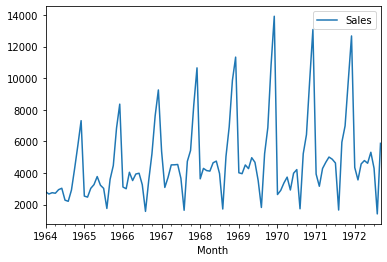

In [18]:
df.plot()

In [21]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [22]:
test_result=adfuller(df['Sales'])

In [23]:
test_result

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [24]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [25]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [31]:
df['Sales'].shift(12)

Month
1964-01-01        NaN
1964-02-01        NaN
1964-03-01        NaN
1964-04-01        NaN
1964-05-01        NaN
1964-06-01        NaN
1964-07-01        NaN
1964-08-01        NaN
1964-09-01        NaN
1964-10-01        NaN
1964-11-01        NaN
1964-12-01        NaN
1965-01-01     2815.0
1965-02-01     2672.0
1965-03-01     2755.0
1965-04-01     2721.0
1965-05-01     2946.0
1965-06-01     3036.0
1965-07-01     2282.0
1965-08-01     2212.0
1965-09-01     2922.0
1965-10-01     4301.0
1965-11-01     5764.0
1965-12-01     7312.0
1966-01-01     2541.0
1966-02-01     2475.0
1966-03-01     3031.0
1966-04-01     3266.0
1966-05-01     3776.0
1966-06-01     3230.0
               ...   
1970-04-01     4276.0
1970-05-01     4968.0
1970-06-01     4677.0
1970-07-01     3523.0
1970-08-01     1821.0
1970-09-01     5222.0
1970-10-01     6872.0
1970-11-01    10803.0
1970-12-01    13916.0
1971-01-01     2639.0
1971-02-01     2899.0
1971-03-01     3370.0
1971-04-01     3740.0
1971-05-01     2927.0
1971

In [29]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
df['Sales First Difference'].head()

Month
1964-01-01      NaN
1964-02-01   -143.0
1964-03-01     83.0
1964-04-01    -34.0
1964-05-01    225.0
Name: Sales First Difference, dtype: float64

In [32]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [33]:
df.head(14)

Sales  Sales First Difference  Seasonal First Difference
Month                                                                
1964-01-01  2815.0                     NaN                        NaN
1964-02-01  2672.0                  -143.0                        NaN
1964-03-01  2755.0                    83.0                        NaN
1964-04-01  2721.0                   -34.0                        NaN
1964-05-01  2946.0                   225.0                        NaN
1964-06-01  3036.0                    90.0                        NaN
1964-07-01  2282.0                  -754.0                        NaN
1964-08-01  2212.0                   -70.0                        NaN
1964-09-01  2922.0                   710.0                        NaN
1964-10-01  4301.0                  1379.0                        NaN
1964-11-01  5764.0                  1463.0                        NaN
1964-12-01  7312.0                  1548.0                        NaN
1965-01-01  2541.0                 -4771.0                     -274.0
1965-02-01  2475.0                   -66.0                     -197.0

In [34]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


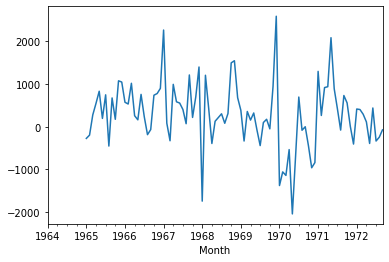

In [35]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
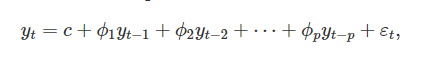

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an ## AR model is often best done with the ## PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an ## MA model is often best done with the ## ACF rather than the ## PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

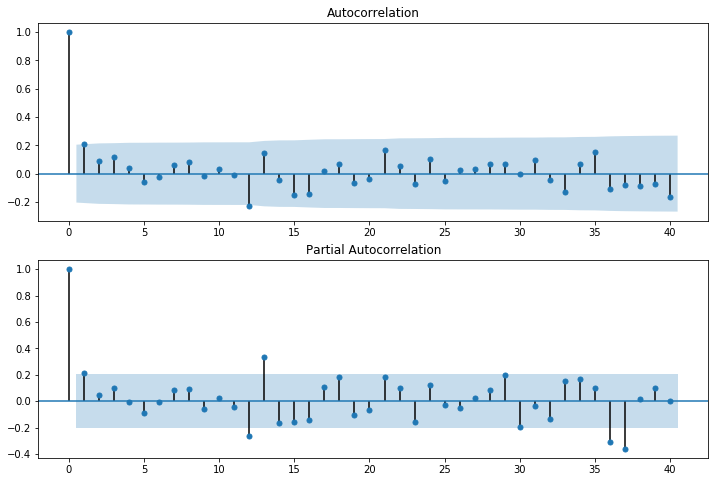

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [39]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [42]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 28 Apr 2020   AIC                           1910.251
Time:                        11:08:06   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.069      -1.532      47.096
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

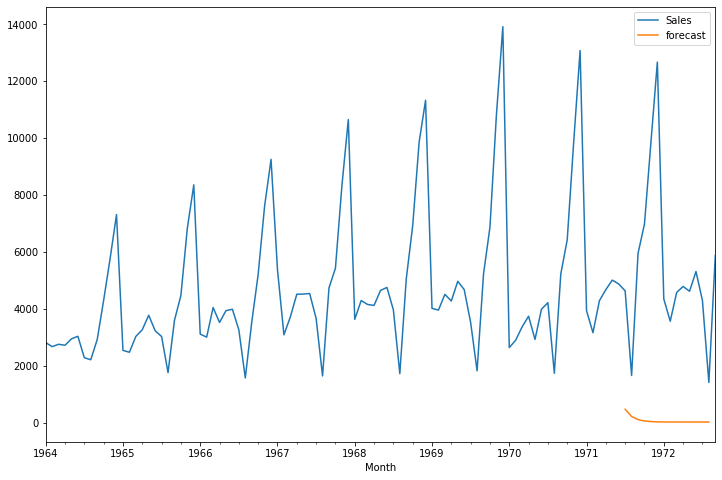

In [43]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [46]:
df.tail(10)

Sales  Sales First Difference  Seasonal First Difference  \
Month                                                                    
1971-12-01  12670.0                  2819.0                     -406.0   
1972-01-01   4348.0                 -8322.0                      414.0   
1972-02-01   3564.0                  -784.0                      402.0   
1972-03-01   4577.0                  1013.0                      291.0   
1972-04-01   4788.0                   211.0                      112.0   
1972-05-01   4618.0                  -170.0                     -392.0   
1972-06-01   5312.0                   694.0                      438.0   
1972-07-01   4298.0                 -1014.0                     -335.0   
1972-08-01   1413.0                 -2885.0                     -246.0   
1972-09-01   5877.0                  4464.0                      -74.0   

             forecast  
Month                  
1971-12-01  29.742273  
1972-01-01  25.805282  
1972-02-01  24.095266  
1972-03-01  23.352527  
1972-04-01  23.029922  
1972-05-01  22.889799  
1972-06-01  22.828938  
1972-07-01  22.802503  
1972-08-01  22.791021  
1972-09-01        NaN

In [47]:
import statsmodels.api as sm

In [48]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


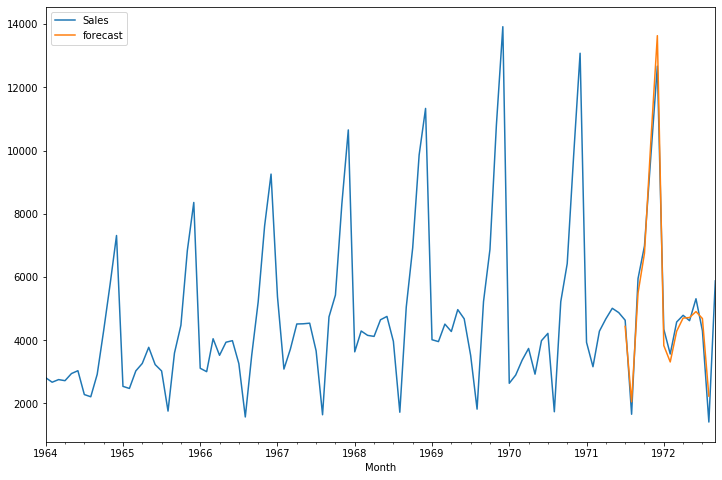

In [49]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [50]:
df.tail(10)

Sales  Sales First Difference  Seasonal First Difference  \
Month                                                                    
1971-12-01  12670.0                  2819.0                     -406.0   
1972-01-01   4348.0                 -8322.0                      414.0   
1972-02-01   3564.0                  -784.0                      402.0   
1972-03-01   4577.0                  1013.0                      291.0   
1972-04-01   4788.0                   211.0                      112.0   
1972-05-01   4618.0                  -170.0                     -392.0   
1972-06-01   5312.0                   694.0                      438.0   
1972-07-01   4298.0                 -1014.0                     -335.0   
1972-08-01   1413.0                 -2885.0                     -246.0   
1972-09-01   5877.0                  4464.0                      -74.0   

                forecast  
Month                     
1971-12-01  13632.323850  
1972-01-01   3832.961857  
1972-02-01   3313.097224  
1972-03-01   4285.476511  
1972-04-01   4701.093067  
1972-05-01   4717.511780  
1972-06-01   4906.404485  
1972-07-01   4685.437306  
1972-08-01   2232.408926  
1972-09-01           NaN

In [51]:
from pandas.tseries.offsets import DateOffset

In [56]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [57]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [58]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [59]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [62]:
future_datest_df.tail(10)

Sales Sales First Difference Seasonal First Difference forecast
1973-11-01   NaN                    NaN                       NaN      NaN
1973-12-01   NaN                    NaN                       NaN      NaN
1974-01-01   NaN                    NaN                       NaN      NaN
1974-02-01   NaN                    NaN                       NaN      NaN
1974-03-01   NaN                    NaN                       NaN      NaN
1974-04-01   NaN                    NaN                       NaN      NaN
1974-05-01   NaN                    NaN                       NaN      NaN
1974-06-01   NaN                    NaN                       NaN      NaN
1974-07-01   NaN                    NaN                       NaN      NaN
1974-08-01   NaN                    NaN                       NaN      NaN

In [63]:
future_datest_df.tail()

Sales Sales First Difference Seasonal First Difference forecast
1974-04-01   NaN                    NaN                       NaN      NaN
1974-05-01   NaN                    NaN                       NaN      NaN
1974-06-01   NaN                    NaN                       NaN      NaN
1974-07-01   NaN                    NaN                       NaN      NaN
1974-08-01   NaN                    NaN                       NaN      NaN

In [66]:
future_datest_df.shape

(23, 4)

In [64]:
future_df=pd.concat([df,future_datest_df])

In [67]:
future_df.shape

(128, 4)

In [69]:
future_df.tail(10)

Sales  Sales First Difference  Seasonal First Difference  \
1973-11-01    NaN                     NaN                        NaN   
1973-12-01    NaN                     NaN                        NaN   
1974-01-01    NaN                     NaN                        NaN   
1974-02-01    NaN                     NaN                        NaN   
1974-03-01    NaN                     NaN                        NaN   
1974-04-01    NaN                     NaN                        NaN   
1974-05-01    NaN                     NaN                        NaN   
1974-06-01    NaN                     NaN                        NaN   
1974-07-01    NaN                     NaN                        NaN   
1974-08-01    NaN                     NaN                        NaN   

                forecast  
1973-11-01  10194.735869  
1973-12-01  13057.412351  
1974-01-01   4731.201301  
1974-02-01           NaN  
1974-03-01           NaN  
1974-04-01           NaN  
1974-05-01           NaN  
1974-06-01           NaN  
1974-07-01           NaN  
1974-08-01           NaN

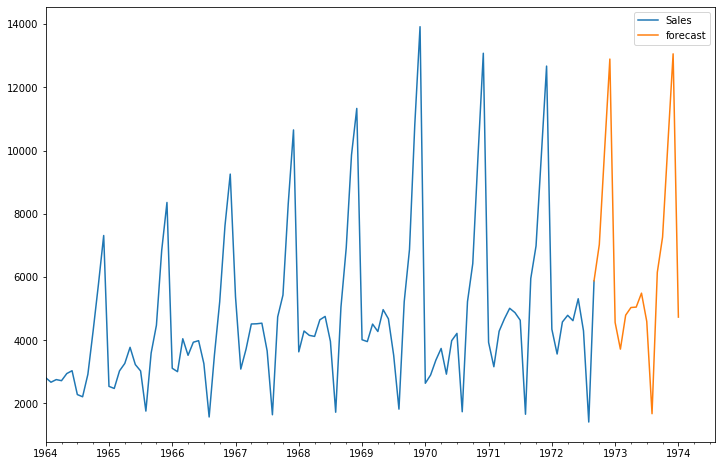

In [65]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 